11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 108ms/step - accuracy: 0.8483 - loss: 0.5114 - val_accuracy: 0.9794 - val_loss: 0.0635
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.9824 - loss: 0.0565 - val_accuracy: 0.9869 - val_loss: 0.0419
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9880 - loss: 0.0385 - val_accuracy: 0.9889 - val_loss: 0.0358
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.9921 - loss: 0.0271 - val_accuracy: 0.9883 - val_loss: 0.0348
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 113ms/step - accuracy: 0.9932 - loss: 0.0232 - val_accuracy: 0.9909 - val_loss: 0.0276
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0338
Test Accuracy: 0.9909
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


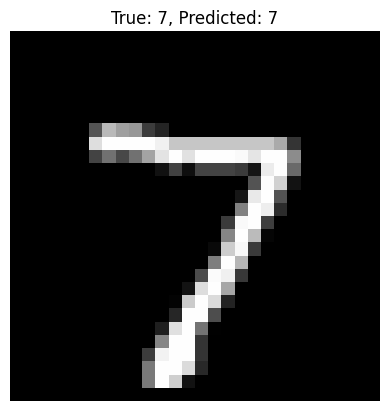

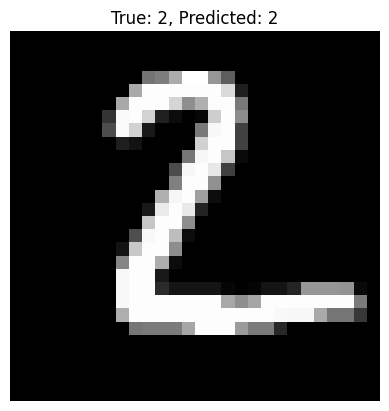

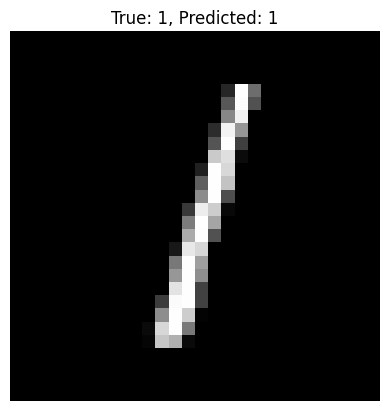

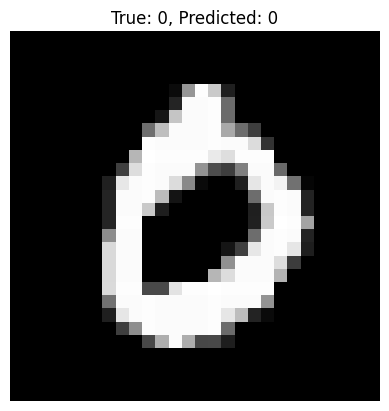

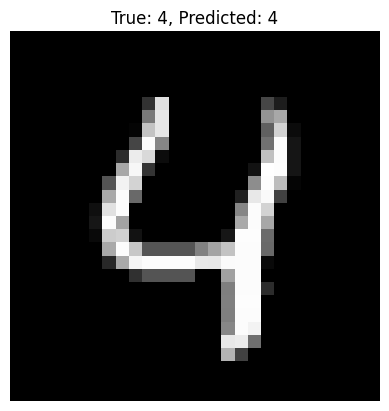

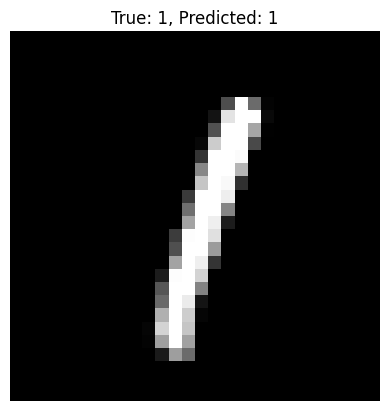

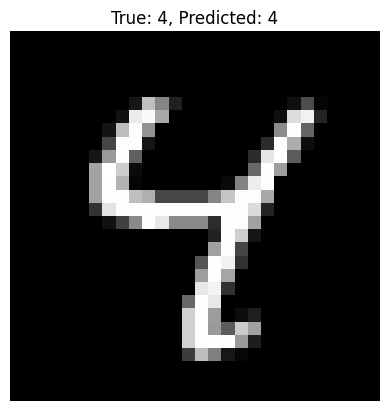

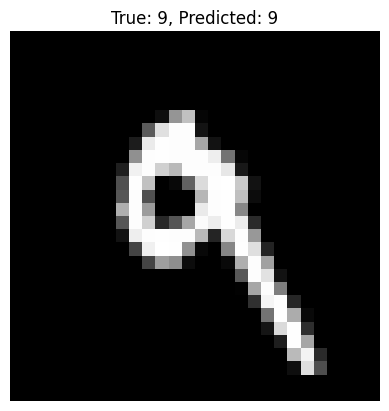

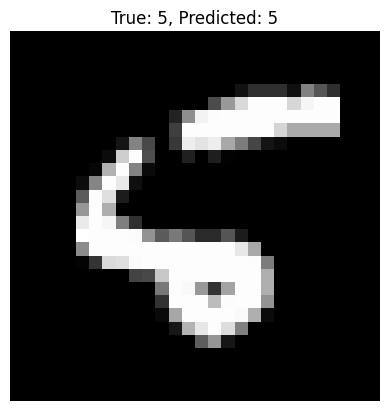

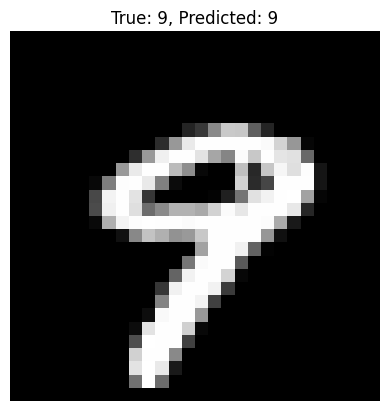

In [22]:
# Handwritten Digit Recognition using Deep Learning

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to fit model input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=5, batch_size=128)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict and visualize some test results
predictions = model.predict(x_test[:10])

for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
